# train.csv analysis

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pylab as plt
%pylab inline
import os
from PIL import Image

Populating the interactive namespace from numpy and matplotlib


In [75]:
df_train_labels = pd.read_csv("train.csv")
df_train_labels.head()

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


In [76]:
len(df_train_labels)

31072

In [77]:
df_train_labels.Target

0           16 0
1        7 1 2 0
2              5
3              1
4             18
5              0
6           25 2
7              0
8            2 0
9              7
10            23
11            21
12          24 0
13            23
14           6 2
15            25
16          25 0
17            25
18             0
19         25 11
20       7 1 2 0
21            11
22          25 2
23          25 0
24          25 3
25          16 6
26          25 2
27            23
28            25
29          12 0
          ...   
31042    25 18 0
31043     25 2 0
31044          0
31045       11 0
31046          0
31047        7 0
31048          4
31049        3 0
31050       25 7
31051     19 2 0
31052       25 7
31053          0
31054          5
31055       25 0
31056     25 3 0
31057         25
31058          4
31059          0
31060         23
31061          0
31062      16 14
31063        5 0
31064      19 23
31065         18
31066       25 0
31067         21
31068          5
31069         

In [78]:
df_train_labels.describe(include='all')

,Id,Target
count,31072,31072
unique,31072,582
top,5a6e85bc-bb9f-11e8-b2b9-ac1f6b6435d0,0
freq,1,2414


In [79]:
df_train_labels.sample(5)

,Id,Target
17200,8e7aa8ca-bbb0-11e8-b2ba-ac1f6b6435d0,0
1721,0eb09c60-bbc6-11e8-b2bc-ac1f6b6435d0,25 0
27215,e0196020-bba3-11e8-b2b9-ac1f6b6435d0,25 0
4024,2189fa42-bbc7-11e8-b2bc-ac1f6b6435d0,22 4 21
3157,1a5d87b0-bba5-11e8-b2ba-ac1f6b6435d0,25 6 2


# label check

In [80]:
label = {
0:  "Nucleoplasm", 
1:  "Nuclear membrane",   
2:  "Nucleoli",   
3:  "Nucleoli fibrillar center" ,  
4:  "Nuclear speckles",
5:  "Nuclear bodies",
6:  "Endoplasmic reticulum",   
7:  "Golgi apparatus",
8:  "Peroxisomes",
9:  "Endosomes",
10:  "Lysosomes",
11:  "Intermediate filaments",   
12:  "Actin filaments",
13:  "Focal adhesion sites",   
14:  "Microtubules",
15:  "Microtubule ends",   
16:  "Cytokinetic bridge",   
17:  "Mitotic spindle",
18:  "Microtubule organizing center",  
19:  "Centrosome",
20:  "Lipid droplets",   
21:  "Plasma membrane",   
22:  "Cell junctions", 
23:  "Mitochondria",
24:  "Aggresome",
25:  "Cytosol",
26:  "Cytoplasmic bodies",   
27:  "Rods & rings"
}

In [81]:
label = pd.Series(label)
label

0                       Nucleoplasm
1                  Nuclear membrane
2                          Nucleoli
3         Nucleoli fibrillar center
4                  Nuclear speckles
5                    Nuclear bodies
6             Endoplasmic reticulum
7                   Golgi apparatus
8                       Peroxisomes
9                         Endosomes
10                        Lysosomes
11           Intermediate filaments
12                  Actin filaments
13             Focal adhesion sites
14                     Microtubules
15                 Microtubule ends
16               Cytokinetic bridge
17                  Mitotic spindle
18    Microtubule organizing center
19                       Centrosome
20                   Lipid droplets
21                  Plasma membrane
22                   Cell junctions
23                     Mitochondria
24                        Aggresome
25                          Cytosol
26               Cytoplasmic bodies
27                     Rods 

In [82]:
label_list = []

for l in label.values:
    label_list.append(l)
    
label_list

['Nucleoplasm',
 'Nuclear membrane',
 'Nucleoli',
 'Nucleoli fibrillar center',
 'Nuclear speckles',
 'Nuclear bodies',
 'Endoplasmic reticulum',
 'Golgi apparatus',
 'Peroxisomes',
 'Endosomes',
 'Lysosomes',
 'Intermediate filaments',
 'Actin filaments',
 'Focal adhesion sites',
 'Microtubules',
 'Microtubule ends',
 'Cytokinetic bridge',
 'Mitotic spindle',
 'Microtubule organizing center',
 'Centrosome',
 'Lipid droplets',
 'Plasma membrane',
 'Cell junctions',
 'Mitochondria',
 'Aggresome',
 'Cytosol',
 'Cytoplasmic bodies',
 'Rods & rings']

In [83]:
for j in label_list:
    df_train_labels[j] = 0   # 0으로 초기화

In [84]:
def fill_rows(row):
    #function which fills dataframe based on target label
    for i in row["Target"].split(" "):
        name = label_list[int(i)]
        row.loc[name] = 1
    return row
        
df_train_labels = df_train_labels.apply(fill_rows, axis=1)

df_train_labels.head()

,Id,Target,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Microtubule organizing center,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# 특정 label에 대한 라벨 분포도

nuclear membrane

In [85]:
class_index = 1  # Nuclear membrane
current_part = df_train_labels[df_train_labels[label[class_index]] == 1]
print('shape before {train_df.shape}, shape after {current_part.shape}')
current_part.head()


shape before {train_df.shape}, shape after {current_part.shape}


,Id,Target,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Microtubule organizing center,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,00456fd2-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
42,0067a7c0-bbb7-11e8-b2ba-ac1f6b6435d0,1 0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65,008b8e7c-bbb4-11e8-b2ba-ac1f6b6435d0,1 0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
reversed_label = dict()
for i in label.keys():
    reversed_label[label[i]] = i
    
labeled_columns = [i for i in reversed_label.keys()]

# labeling counts

Nucleoplasm가 가장 많이 data에 등장

총 31072개의 단백질중에 12885번 nucleoplasm 등장

In [87]:
df_train_labels[labeled_columns].sum(0).sort_values(ascending=False)

Nucleoplasm                      12885
Cytosol                           8228
Plasma membrane                   3777
Nucleoli                          3621
Mitochondria                      2965
Golgi apparatus                   2822
Nuclear bodies                    2513
Nuclear speckles                  1858
Nucleoli fibrillar center         1561
Centrosome                        1482
Nuclear membrane                  1254
Intermediate filaments            1093
Microtubules                      1066
Endoplasmic reticulum             1008
Microtubule organizing center      902
Cell junctions                     802
Actin filaments                    688
Focal adhesion sites               537
Cytokinetic bridge                 530
Cytoplasmic bodies                 328
Aggresome                          322
Mitotic spindle                    210
Lipid droplets                     172
Peroxisomes                         53
Endosomes                           45
Lysosomes                

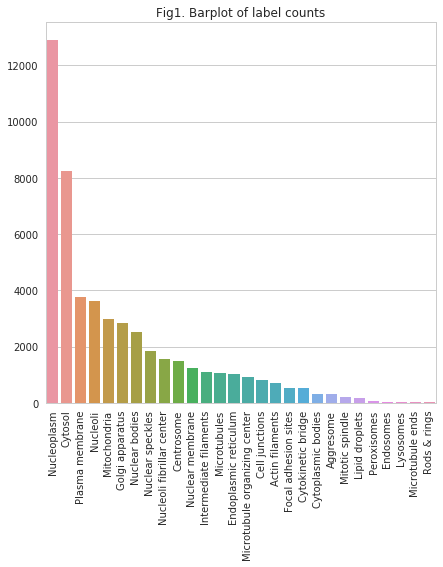

In [88]:
plt.figure(figsize=(7,7))
plt.title("Fig1. Barplot of label counts")
sns.barplot(x=df_train_labels[labeled_columns].sum(0).sort_values(ascending=False).index,
           y=df_train_labels[labeled_columns].sum(0).sort_values(ascending=False))
plt.xticks(rotation=90);

# label간 correlation

초록색에 가까울수록 연관성이 높은거

Lysosomes & Endosomes이 가장 연관성이 높다. 즉 같이 나타난 경우가 많다.

Cytokinetic bridge & Mitotic spindle도 연관성 높음.

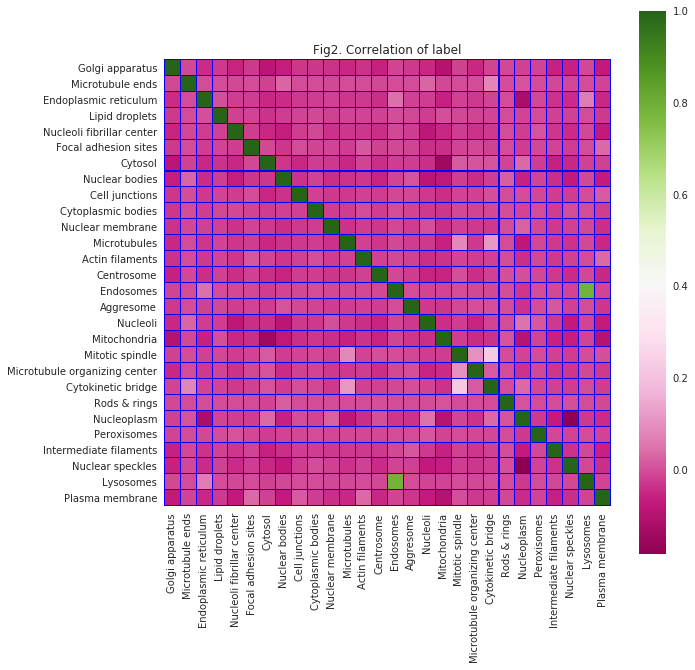

In [89]:
plt.figure(figsize=(10,10))
plt.title("Fig2. Correlation of label")
sns.heatmap(df_train_labels[labeled_columns].corr(), cmap="PiYG", linewidths=.05,
           linecolor='b',square=True)

In [59]:
def find_counts(special_target, labels):
    counts = labels[labels[special_target] == 1].drop(
        ["Id", "Target", "number_of_targets"],axis=1
    ).sum(axis=0)
    counts = counts[counts > 0]
    counts = counts.sort_values()
    return counts

Lysosomes -  이건 단독으로 안나온것중 하나

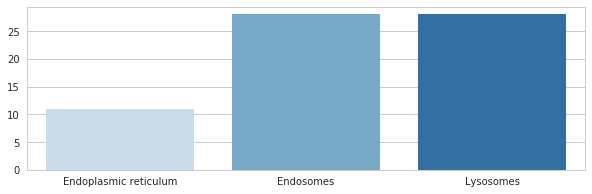

In [60]:
lyso_endo_counts = find_counts("Lysosomes", df_train_labels)

plt.figure(figsize=(10,3))
sns.barplot(x=lyso_endo_counts.index.values, y=lyso_endo_counts.values, palette="Blues")

 Endosomes

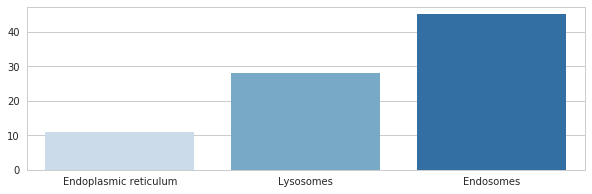

In [61]:
lyso_endo_counts = find_counts("Endosomes", df_train_labels)

plt.figure(figsize=(10,3))
sns.barplot(x=lyso_endo_counts.index.values, y=lyso_endo_counts.values, palette="Blues")

Cytokinetic bridge

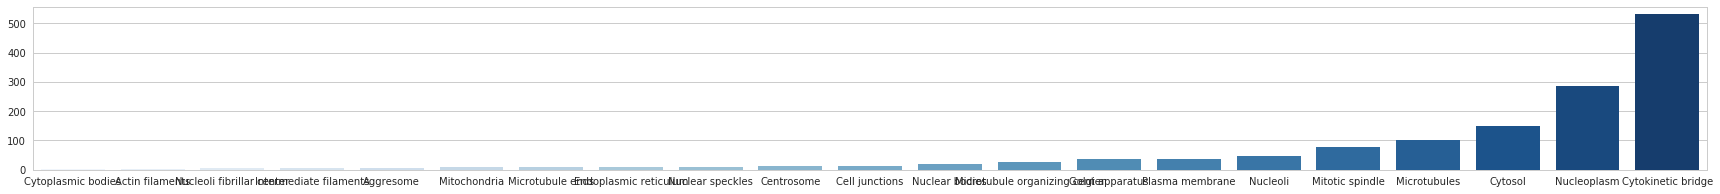

In [64]:
lyso_endo_counts = find_counts("Cytokinetic bridge", df_train_labels)

plt.figure(figsize=(30,3))
sns.barplot(x=lyso_endo_counts.index.values, y=lyso_endo_counts.values, palette="Blues")

Mitotic spindle - 이건 단독으로 안나온것중 하나

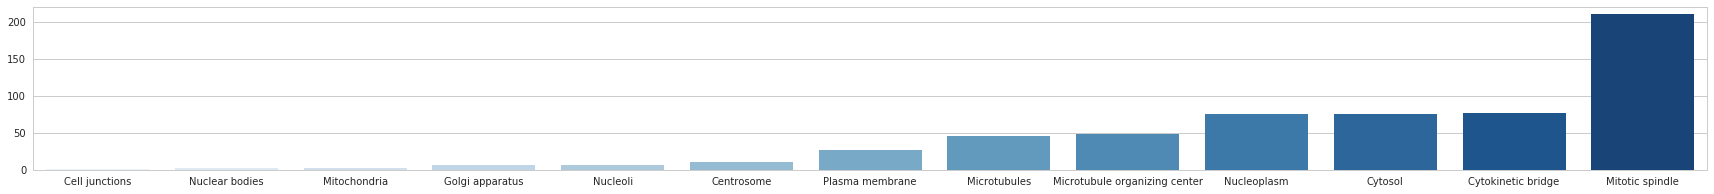

In [65]:
lyso_endo_counts = find_counts("Mitotic spindle", df_train_labels)

plt.figure(figsize=(30,3))
sns.barplot(x=lyso_endo_counts.index.values, y=lyso_endo_counts.values, palette="Blues")

Rods and rings

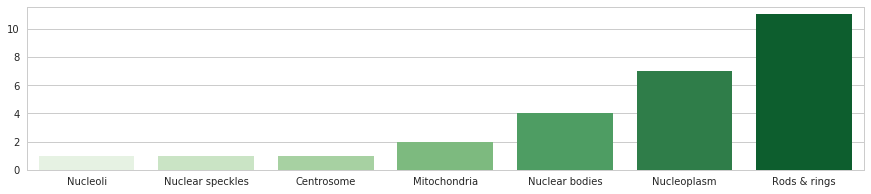

In [67]:
rod_rings_counts = find_counts("Rods & rings", df_train_labels)
plt.figure(figsize=(15,3))
sns.barplot(x=rod_rings_counts.index.values, y=rod_rings_counts.values, palette="Greens")

Microtubule ends -  이건 단독으로 안나온것중 하나

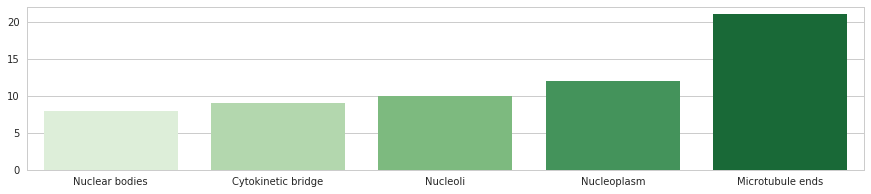

In [69]:
rod_rings_counts = find_counts("Microtubule ends", df_train_labels)
plt.figure(figsize=(15,3))
sns.barplot(x=rod_rings_counts.index.values, y=rod_rings_counts.values, palette="Greens")

Peroxisomes

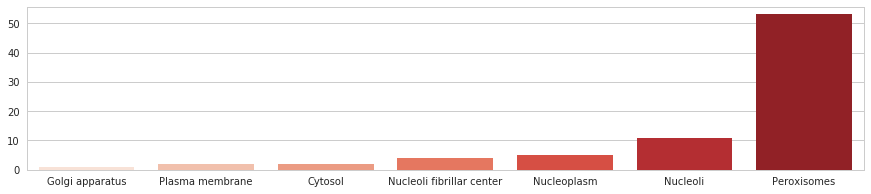

In [71]:
peroxi_counts = find_counts("Peroxisomes", df_train_labels)

plt.figure(figsize=(15,3))
sns.barplot(x=peroxi_counts.index.values, y=peroxi_counts.values, palette="Reds")

초록: 다른거랑 같이 라벨링
    
보라: 이것만 라벨링

항상 다른것과 같이 나오는 애들을 주목해야할듯. 즉 보라색이 없고 초록색만 있는거

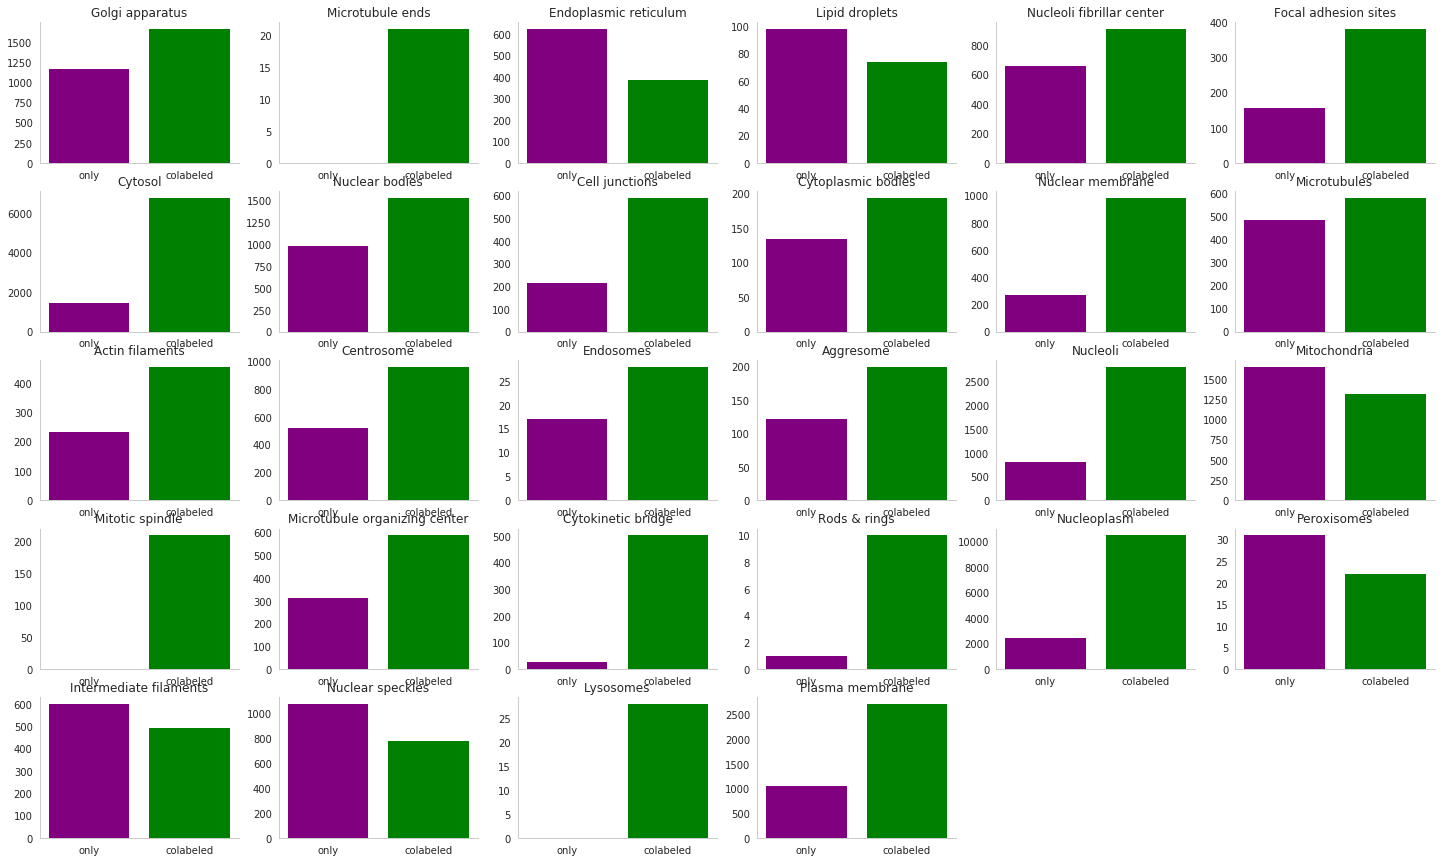

In [90]:
plt.figure(figsize=(25,15))
for i, loca in enumerate(labeled_columns):
    ax = plt.subplot(5,6,i+1)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.grid(False)
    only = df_train_labels[(df_train_labels[loca] == 1) & 
                   (df_train_labels.sum(1) == 1)].shape[0]
    co_labeled = df_train_labels[(df_train_labels[loca] == 1) & 
                   (df_train_labels.sum(1) > 1)].shape[0]

    plt.title(loca)
    plt.bar(x=[0,1], height=[only,co_labeled], tick_label=["only", "colabeled"], color=["purple", "green"])

# 단백질당 labeling 분포

label이 하나인게 가장 많고 최대 5개까지 존재

Text(0,0.5,'% of data')

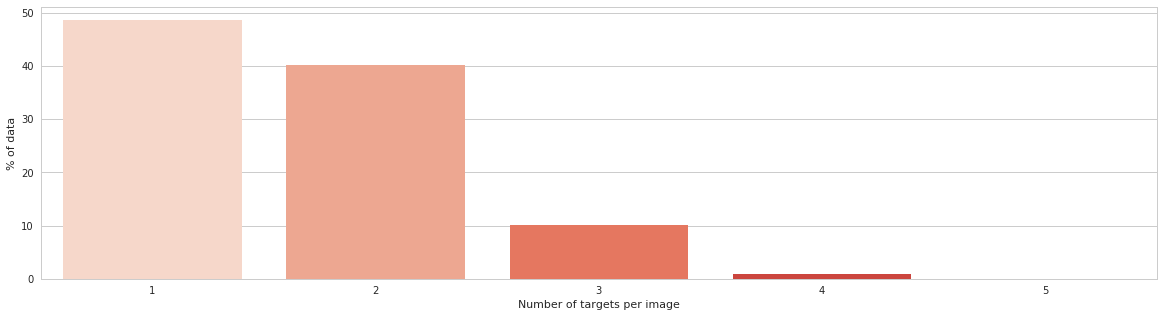

In [58]:
df_train_labels["number_of_targets"] = df_train_labels.drop(["Id", "Target"],axis=1).sum(axis=1)
count_perc = np.round(100 * df_train_labels["number_of_targets"].value_counts() / df_train_labels.shape[0], 2)
plt.figure(figsize=(20,5))
sns.barplot(x=count_perc.index.values, y=count_perc.values, palette="Reds")
plt.xlabel("Number of targets per image")
plt.ylabel("% of data")